In [26]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [4]:
df['person_emp_length'].describe()

count    31686.000000
mean         4.789686
std          4.142630
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max        123.000000
Name: person_emp_length, dtype: float64

In [5]:
df.loc[df['person_emp_length']>=100]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4


In [6]:
df.loc[df['person_emp_length'].isna()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32285,38,12000,OWN,NaN,EDUCATION,A,4800,7.29,1,0.40,N,12
32328,51,18408,RENT,NaN,PERSONAL,C,1000,14.65,1,0.05,Y,20
32360,70,39996,RENT,NaN,MEDICAL,C,3600,15.23,0,0.09,Y,19
32453,56,32400,RENT,NaN,MEDICAL,A,8575,7.51,0,0.26,N,18


In [7]:
df= df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28638 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28638 non-null  int64  
 1   person_income               28638 non-null  int64  
 2   person_home_ownership       28638 non-null  object 
 3   person_emp_length           28638 non-null  float64
 4   loan_intent                 28638 non-null  object 
 5   loan_grade                  28638 non-null  object 
 6   loan_amnt                   28638 non-null  int64  
 7   loan_int_rate               28638 non-null  float64
 8   loan_status                 28638 non-null  int64  
 9   loan_percent_income         28638 non-null  float64
 10  cb_person_default_on_file   28638 non-null  object 
 11  cb_person_cred_hist_length  28638 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.8+ MB


In [9]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [30]:
df['person_home_ownership'].value_counts()

RENT        14551
MORTGAGE    11801
OWN          2192
OTHER          94
Name: person_home_ownership, dtype: int64

Text(0, 0.5, 'Count')

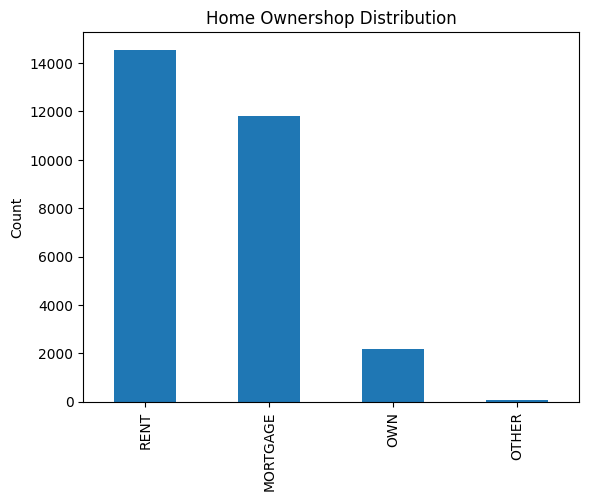

In [57]:
person_home_df = df['person_home_ownership'].value_counts()
person_home_df.plot(kind='bar')
plt.title('Home Ownershop Distribution')
plt.ylabel('Count')
plt.xlabel('Ownership')

In [47]:
has_loan = df.loc[df['loan_status']==1]

Text(0.5, 0, 'Ownership')

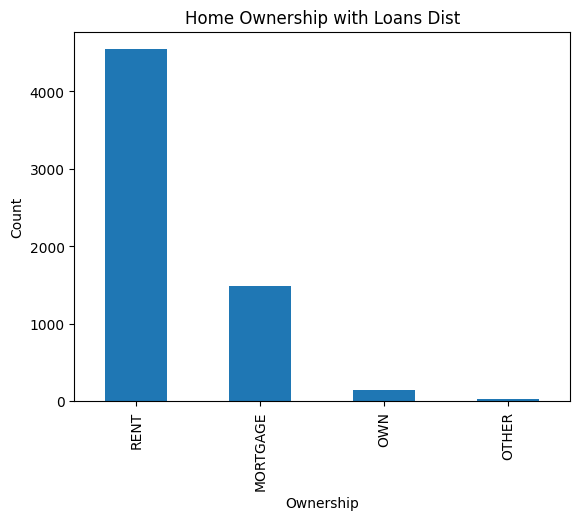

In [58]:
loan_home_owner = has_loan['person_home_ownership'].value_counts()
loan_home_owner.plot(kind='bar')
plt.title('Home Ownership with Loans Dist')
plt.ylabel('Count')
plt.xlabel('Ownership')

In [32]:
df['loan_intent'].value_counts()

EDUCATION            5704
MEDICAL              5293
VENTURE              5001
PERSONAL             4877
DEBTCONSOLIDATION    4565
HOMEIMPROVEMENT      3198
Name: loan_intent, dtype: int64

In [36]:

loan_intent_data = {'loan_intent': ['EDUCATION', 'MEDICAL', 'VENTURE', 'PERSONAL', 'DEBTCONSOLIDATION', 'HOMEIMPROVEMENT'],
                   'quantity': [5704, 5293, 5001, 4877, 4565, 3198]}
loan_intent_df =pd.DataFrame(loan_intent_data)

Text(0.5, 1.0, 'Loan Intent Categories and Percentages')

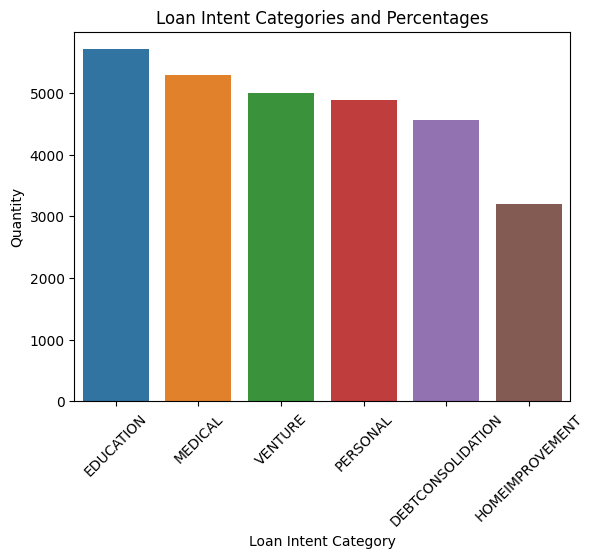

In [37]:
sns.barplot(x='loan_intent', y='quantity', data=loan_intent_df)
plt.xlabel('Loan Intent Category')
plt.xticks(rotation=45)
plt.ylabel('Quantity')
plt.title('Loan Intent Categories and Percentages')

<AxesSubplot: >

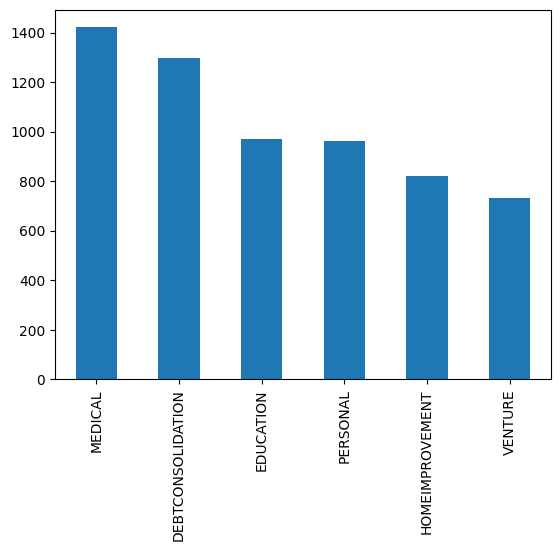

In [61]:
has_loan_intent = has_loan['loan_intent'].value_counts()
has_loan_intent.plot(kind='bar')

In [66]:
df['loan_int_rate']

0        16.02
1        11.14
2        12.87
3        15.23
4        14.27
         ...  
32576    13.16
32577     7.49
32578    10.99
32579    11.48
32580     9.99
Name: loan_int_rate, Length: 28638, dtype: float64

Text(0.5, 1.0, 'Histogram of Loan Interest Rates')

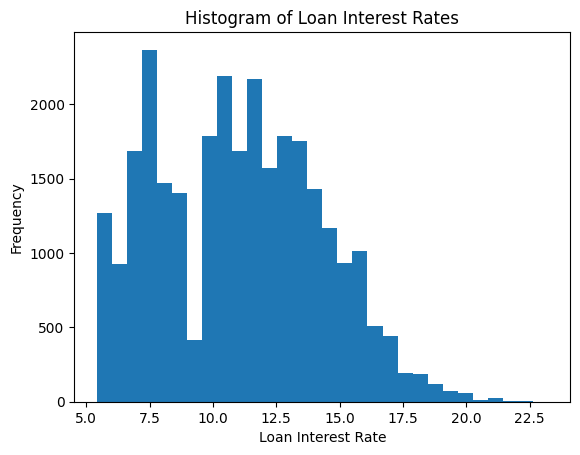

In [67]:
plt.hist(df['loan_int_rate'], bins=30)
plt.xlabel('Loan Interest Rate')
plt.ylabel('Frequency')
plt.title('Histogram of Loan Interest Rates')

Text(0, 0.5, 'Count')

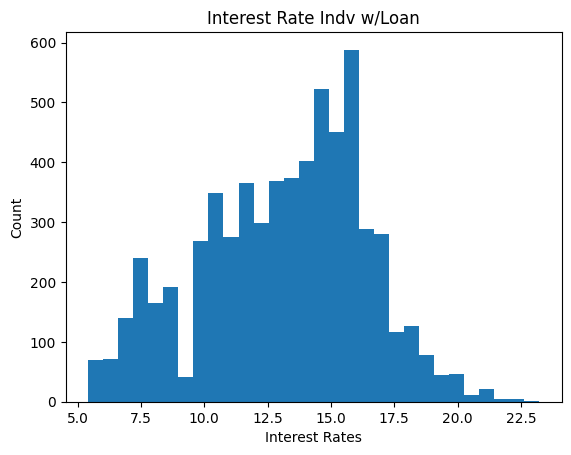

In [81]:
plt.hist(has_loan['loan_int_rate'], bins=30)
plt.title('Interest Rate Indv w/Loan')
plt.xlabel('Interest Rates')
plt.ylabel('Count')

Text(0.5, 1.0, 'Distribution of Individual w.Loans')

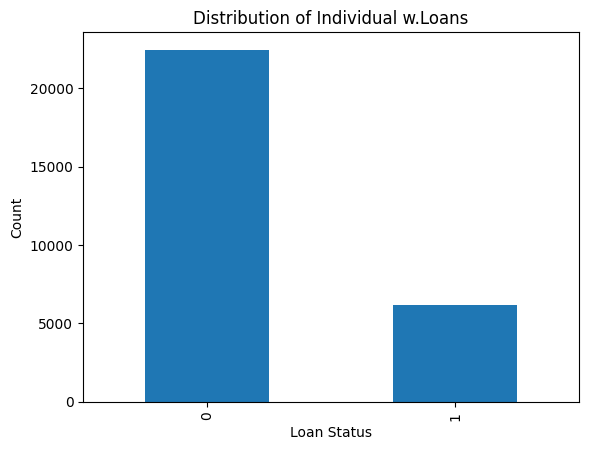

In [86]:
loans= df['loan_status'].value_counts()
loans.plot(kind='bar')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Distribution of Individual w.Loans')

In [88]:
df['cb_person_cred_hist_length'].value_counts(normalize=True)

3     0.182729
4     0.182555
2     0.182415
7     0.058419
8     0.058140
9     0.058105
5     0.057965
6     0.057371
10    0.057092
14    0.015225
12    0.014875
11    0.014317
13    0.013514
16    0.013514
15    0.012920
17    0.012117
20    0.001013
24    0.000943
28    0.000768
22    0.000733
23    0.000663
30    0.000663
19    0.000629
27    0.000629
21    0.000629
25    0.000594
26    0.000559
18    0.000524
29    0.000384
Name: cb_person_cred_hist_length, dtype: float64

In [11]:
def dummyEncode_column(column):
    le = LabelEncoder()
    df[f'{column.name}'] = le.fit_transform(df[f'{column.name}'])
    globals() [f'df_{column.name}_categories'] = list(le.classes_)

    print(f'After passing column ["{column.name}]" through LabelEncoder(): \n')

    for i in range(0, len(list(le.classes_))):
        print(f'Categorical value {le.inverse_transform([i])} is replaced with numerical value {[i]}')
    print (f'\n[df_{column.name}_categories] = ', globals() [f'df_{column.name}_categories'])
    display(df)

In [12]:
dummyEncode_column(df['person_home_ownership'])

After passing column ["person_home_ownership]" through LabelEncoder(): 

Categorical value ['MORTGAGE'] is replaced with numerical value [0]
Categorical value ['OTHER'] is replaced with numerical value [1]
Categorical value ['OWN'] is replaced with numerical value [2]
Categorical value ['RENT'] is replaced with numerical value [3]

[df_person_home_ownership_categories] =  ['MORTGAGE', 'OTHER', 'OWN', 'RENT']


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,2,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,0,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,3,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,3,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,0,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,0,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,3,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,0,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [14]:
dummyEncode_column(df['loan_intent'])

After passing column ["loan_intent]" through LabelEncoder(): 

Categorical value ['DEBTCONSOLIDATION'] is replaced with numerical value [0]
Categorical value ['EDUCATION'] is replaced with numerical value [1]
Categorical value ['HOMEIMPROVEMENT'] is replaced with numerical value [2]
Categorical value ['MEDICAL'] is replaced with numerical value [3]
Categorical value ['PERSONAL'] is replaced with numerical value [4]
Categorical value ['VENTURE'] is replaced with numerical value [5]

[df_loan_intent_categories] =  ['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL', 'PERSONAL', 'VENTURE']


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,D,35000,16.02,1,0.59,Y,3
1,21,9600,2,5.0,1,B,1000,11.14,0,0.10,N,2
2,25,9600,0,1.0,3,C,5500,12.87,1,0.57,N,3
3,23,65500,3,4.0,3,C,35000,15.23,1,0.53,N,2
4,24,54400,3,8.0,3,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,0,1.0,4,C,5800,13.16,0,0.11,N,30
32577,54,120000,0,4.0,4,A,17625,7.49,0,0.15,N,19
32578,65,76000,3,3.0,2,B,35000,10.99,1,0.46,N,28
32579,56,150000,0,5.0,4,B,15000,11.48,0,0.10,N,26


In [15]:
df['loan_grade'].value_counts(normalize=True)

A    0.328305
B    0.319540
C    0.199001
D    0.113416
E    0.030379
F    0.007298
G    0.002060
Name: loan_grade, dtype: float64

In [16]:
dummyEncode_column()

TypeError: dummyEncode_column() missing 1 required positional argument: 'column'

# Carlos we need to do eda before dummylabel 